##### *Cristina Cosma*

# **DATA SCIENCE**

## **Sprint 9. ML - Análisis de sentimiento y Natural Language Process (NLP)**


**Objetivos:**

* Realizar minería de textos.
* Interpretación de los textos.
* Análisis de los resultados

___________
Entrega: Enviar la URL a un repositorio llamado *ML_unsupervised* que contenga la solución.
URL : **https://github.com/CristinaCosma/Text_mining** 
___________

**Introducción:**

El análisis de sentimiento es el proceso de determinar "computacionalmente" **si un escrito es positivo, negativo o neutral**. También se conoce como **minería de opiniones**, y deriva la opinión o actitud de un orador.


Negocios: en el campo del marketing, las empresas lo utilizan para desarrollar sus estrategias, para comprender los sentimientos de los clientes hacia los productos o la marca, cómo responden las personas a sus campañas o lanzamientos de productos y por qué los consumidores no compran algunos productos.
 
Política: En el ámbito político, se utiliza para realizar un **seguimiento de la visión** política, para detectar **coherencia ó inconsistencia** entre declaraciones y acciones a nivel de gobierno. ¡También se puede utilizar para predecir resultados electorales.

Acciones públicas: el análisis de sentimientos también se utiliza para monitorear y analizar fenómenos sociales, para detectar situaciones potencialmente peligrosas y determinar el **estado de ánimo general** en redes socales.
Traducido de : https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

Los resultados de los análisis pueden dar :

    neg: Negativo
    neu: Neutro
    pos: Positivo
    compound: la suma normalizada

Donde "compound = normalize(sum_s), compound score is computed with the sum_s before the pos, neg and neu scores are computed using _sift_sentiment_scores() that computes the invidiual pos, neg and neu scores"
https://stackoverflow.com/questions/40325980/how-is-the-vader-compound-polarity-score-calculated-in-python-nltk

### **0. Importar las librerías necesarias, cargar el dataset, analizar preparar los datos**

Para que funcionen las importaciones, hay que instalar previamente las librerías faltantes en el cmd y especialmente las correspondientes al análisis de texto

-> conda install -c conda-forge textblob

-> conda install -c conda-forge spacy

In [1]:
# Importamos las librerías

import pandas as pd
import numpy as np

# visualización
import matplotlib.pyplot as plt

# importamos paquetes y librerías para los ejercicios 2 y 3

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer

from textblob import TextBlob
from collections import Counter


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Buba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Buba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Buba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Cargamos el modelo ya pre-entrenado para el idioma inglés en spaCy y "en_core_web_sm"

import spacy
from spacy.language import Language
from spacy import displacy

# hacemos unas verificaciones a ver si se ha cargado

from spacy.lang.en.examples import sentences 

nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)
    

Apple is looking at buying U.K. startup for $1 billion
Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN dobj
startup VERB dep
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


In [4]:
import en_core_web_sm
nlp = en_core_web_sm.load()

### **1. Elegir un texto en inglés y calcula la frecuencia de sus palabras.**

Analizaremos el texto de la entrevista sobre el tema ***Elon Musk Speech: Future, A.I. and Mars*** que tuvo lugar en Dubái durante el ***World Government Summit***, entrevista moderada por H.E. Mohammad Al Gergawi. 

El objetivo es ver hasta que punto esta conversación de Musk y el periodista dubaití tiene una visión utópica de la vida y del futuro, de Marte y de la AI o si es una visión equilibrada, hasta cierto punto "realista", o al contratio, más bien negativa o con dudas y miedos.

-> Se incluirán tanto las preguntas del anfitrión (AlGergawi) como las respuestas del invitado (Musk) pensando que no van a influír demasiado en el análisis. Sin embargo, se podrían quitar las preguntas y comentarios del anfitrión y analizar únicamente las de Elon Musk.

-> El texto se encuentra en esta página :
https://www.englishspeecheschannel.com/english-speeches/elon-musk-speech/

In [61]:
Musk = """When something is important enough, you do it even if the odds are not in your favour. 

In life, we’ve seen, within this part of the world, great people, like Al-Khawarizmi who invented algorithm. 
Globally, Newton. Henry Ford, the Wright Brothers, Albert Einstein and Elon Musk. See, you are in rush, You want to go to places that nobody has been. You are re-inventing a certain industry, from the rocket industry with SpaceX to the car industry with Tesla. What’s your life mission? Why do you do whatever you do?
Sure, first of all, thank you for having me. It’s an honor to be here. And I’m having a really great time with my kids in Dubai. It’s really been fantastic. I really encourage anyone who hasn’t been to visit, what a great city! Thank you.
And, in terms of the motivations, I used to like this sort of… kind of a long version of the explanation but… essentially, when I was a kid I was wondering, what’s the meaning of life? Like, why are we here? What is it all about? And I came to the conclusion that what really matters is trying to understand the right questions to ask. And the more that we can increase the scope and scale of human consciousness, the better we’re able to ask these questions. And… So, I think there are certain things that are necessary to ensure that the future is good. And… some of those things are in the long term having long term sustainable transport and sustainable energy generation. And to be a space exploring civilization. And for humanity to be out there among the stars. And be a multi-planetary species. I think that being a multi-planetary species and being out there among the stars is important for the long-term survival of humanity. And, that’s one reason, kind of like life insurance for life collectively. Life as we know it. But then the part that I find personally most motivating is that it creates a sense of adventure, and it makes people excited about the future. If you consider two futures, one where we are forever confined to Earth until eventually something terrible happens. Or another future where we are out there on many planets, maybe even going beyond the solar system. I think that space invasion is incredibly exciting and inspiring. And there need to be reasons to get up in the morning. You know, life can’t just be about solving problems. Otherwise, what’s the point? There’s got to be things that people find inspiring and make life worth living.

So, what is life for you? I mean, you look at our life, and I heard you before speaking. Is it a dream? Is it real? Is it a million deal? What is life for Elon Musk?
I find that as I get older I find that question to be maybe more and more confusing or troubling or uncertain. Particularly when you see the advancement of something like video games. You know, 40 years ago, you had video games, the most advanced video game would be like Pong, when you had two rectangles and a dot. And you’re like batting it back and forth. – I played it. – Yeah, me too, exactly. – Us all. – It sort of dates you a little bit. Yeah, we both played the same game. And that was like a pretty fun game at the time. But now, you can see a video game that’s photo-realistic, almost photo-realistic, and millions of people playing simultaneously. And, and you see where things are going with virtual reality. And augmented reality and… if you extrapolate that out into the future with any rate of progress at all, like keeping 0.1% of something like that a year, then eventually those games will be indistinguishable from reality. They’ll be so realistic you won’t be able to tell the difference between that game and reality as we know it. And then, it seems like, well, how do we know that that didn’t happen in the past? And that we’re not in one of those games ourselves?

Interesting. Interesting. I mean, it could be. Everything is possible in life.
I mean there’s… Yeah, particularly like things tend to be accelerating to something.

Isn’t it? I mean, if we look at our life, it seems in the past 100 years life has been accelerating quite fast. – Yeah. – In the past 20 years. – It’s getting faster and faster. – Is it more slow? So, my question is really, how will life be 20, 30, 50 years from now? Our education, our transport. How do you see it?

Well, I think this is one of those things that are quite difficult to predict. When you think of, say, the first controlled power flight was in 1903 with the Wright Brothers. And then, 66 years later we put the first people on the moon. I mean, if you asked people, say, in 1900, what are the odds of landing on the moon they would’ve said that’s ridiculous. If you try to talk to them about the internet they wouldn’t know what the heck you’re even… What are you talking about? Like, this sounds so crazy. But today, with a hundred-dollar device you can video-conference with anyone in the world. On the other side of the world, and if you have a Wi-Fi connection, it’s basically free. You’re free to have an instant visual communication with anyone, or even with millions of people. You know, with social media you can communicate to millions of people simultaneously. So, and you can google something and ask any question. It’s like an oracle of wisdom, that you can ask almost any questions and get an instant response. It would be incredibly difficult to predict these things in the past. Even the relatively recent past. So, I think the one thing that we can be quite certain of is that any predictions we make today for what the future will be like in 50 years will be wrong That’s for sure. I think directionally, I can tell you what I hope the future has, as opposed to maybe what it will be. This may just be wishful thinking.
I mean I hope we are out there on Mars and maybe beyond Mars, Jupiter. I hope we’re traveling frequently throughout the solar system, perhaps preparing for missions to nearby star systems. I think all of that is possible in 50 years. And I think it’s going to be very exciting to do that. And, I think we’ll see autonomy and artificial intelligence advance tremendously. Like that’s actually quite near term. My guess is in probably 10 years, it will be very unusual for cars to be built that are not fully autonomous. – 10 years. – 10 years from now? Yeah. I think almost all cars built will be able of full autonomy in about 10 years. As it is, the Tesla cars that are made today, have the sensor system necessary for full autonomy. And we think probably enough compute power to be safer than a person. So, it’s mostly just the question of developing the software and uploading the software. And if it turns out that more compute power is needed, we can easily upgrade the computer. And, so that’s all Teslas built since October last year. And other manufacturers will follow and do the same thing. So, getting in a car will be like getting in an elevator. You just tell it where you want to go, and it takes you there with extreme levels of safety. And that will be normal, that will just be normal. Like, for elevators, they used to be elevator operators. You get in, there will be a guy moving a lever. Now, you just get in, you press the button and that’s taken for granted. So, autonomy will be wide-spread.
I think one of the most troubling questions is artificial intelligence. And I don’t mean narrow AI, like, vehicle autonomy I would put in the narrow AI class. It’s narrowly trying to achieve a certain function. But deep artificial intelligence, or what is sometimes called artificial general intelligence, where you can have AI that is much smarter than the smartest human on Earth. This, I think, is a dangerous situation.

Why is it dangerous? I mean, there are two views, one view is that artificial intelligence will help humanity, and there’s another school of thought that artificial intelligence is a threat to humanity. – Why is that?
I think it’s both. You know, it’s like… one way to think of it is imagine we’re going to be visited… imagine you’re very confident that we’re going to be visited by super intelligent aliens, in let’s say 10 years or 20 years at the most. – Super intelligent.

So, you think within 20 years… – Yeah… – we’ll have aliens on Earth?
Well, digital super intelligence will be like an alien. – It will be like an alien. – Yeah. But my question is, do you think there is other intelligent life outside the Earth? It seems probable. I think this is one of the great questions in physics and philosophy, is, where are the aliens? Maybe they are among us, I don’t know. Some people think I’m an alien. Not true. – Not true.
But maybe we are aliens. Maybe we aliens. I mean, if you look at this part of the world. Yeah. They believe that human beings are not from Earth, they came from somewhere else. Eve and Adam came from somewhere else to Earth. So, in a way, human beings are aliens to this land. Do you think we’ll make contact with aliens within the next 50 years?
Well, that’s a really tough one to say. If there are super intelligent aliens out there, they’re probably already observing us. That would seem quite likely and we’re not smart enough to realize it. But I can do some back of the envelope calculations and… any advanced alien civilization that is at all interested in populating the galaxy, even without exceeding the speed of light, even if you’re only moving at, say, 10 or 20 per cent of the speed of light, you could populate the entire galaxy in let’s say 10 million years. Maybe 20 million years max. This is nothing in the grand scheme of things.
Once you said you wanted to die on Mars. Why?
To be clear, I don’t want to die on Mars. It’s like, if… we’re all going to die someday, and if you’re going to pick some place to die, then why not Mars? You know, if you’re born on Earth, why not die on Mars? Seems like may be quite exciting. But, I think given the choice between dying on Earth and dying on Mars, I’d say, yeah, sure, I’ll die on Mars. But it’s not some kind of Mars death wish. And if I do die on Mars, I just don’t want to go on impact.

Let’s come back to Earth, actually. You tweeted that you are building a tunnel under Washington D.C. Why?
What is it? – It’s a secret plot. – Okay. – Just between us. – Nobody helps you? Yeah, exactly, let’s keep that a secret. I think this is going to sound a little… I mean, it seems like so much trivial or silly, but… I’ve been saying this for many years now, but I think that the solution to urban congestion is a network of tunnels under cities. And when I say that I don’t mean a 2-D plan of tunnels, I mean tunnels that go many levels deep. So, you can always go deeper than you can go up. Like, the deepest mines are deeper than the tallest buildings. So, you can have a network of tunnels that is 20, 30, 40, 50 levels, as many levels as you want, really. And so, given that, you can overcome the congestion situation in any city in the world. The challenge is how do you build tunnels quickly and at low cost and with high safety? So, if tunnel technology can be improved to the point where you can build tunnels fast, cheap and safe, then that would completely get rid of any traffic situations in the cities. And so, that’s why I think it’s an important technology. And, Washington D.C., L.A and most of the major American cities, most major cities in the world suffer from severe traffic issues. And it’s mostly because you’ve got these buildings which are, these tall buildings that are 3-D and you have a road network that is one level. And then, people generally want to go in and out of these buildings at the exact same time. So, then, you get the traffic jam.

Let’s come back to… your year in Dubai. The first time I met you it was the 4th of June 2015, at your office in SpaceX. And, I asked you would you have a presence in UAE? And your answer was: I’m busy with China. Maybe not in the near future, and almost a year and a half later, we are here, seems time goes quite fast. Why now?
I think actually things are going really well in China. So, we have some initial challenges figuring out charging and service infrastructure and various other things, but now it’s actually going really well, and… so the timing seems to be good to really make a significant debut in this region, starting in Dubai.

In your opinion, what is the new disturbing thing that will come next in technology? What’s next in technology? – What’s next in technology? – That will disturb the way we live, the way we think, the way we do business.
Well, the most near to impact from a technological standpoint is autonomous cars, like fully self-driving cars. I’d say that’s going to happen much faster than people realize. so, and that’s… it’s going to be a great convenience to be in an autonomous car, but there are many people whose job is to drive. So, if… in fact I think it might be the single largest employer of people is driving in various forms. And so, then we need to figure out new rules for what do these people do. But it will all be very disruptive and very quick. I should characterize what I mean by quick. Because there are… Quick means different things to different people. There are about two billion vehicles in the world. Approaching in fact 2.5 billion cars and trucks in the world. The total new vehicle production capacity is about a hundred million. Which makes sense, because the life of a car or truck before it’s finally scraped is about 20-25 years. So, so the point at which we see full autonomy appear will not be the point at which there is massive societal upheaval, because it will take a long time to make enough autonomous vehicles to disrupt employment. So, that disruption I’m talking about will take place over about 20 years. Still, 20 years is a short period of time to have I think something like 12 to 15 per cent of the world force be unemployed.

Thank you. This is the largest global government summit we have over 139 governments here. If you want to advise government officials to be ready for the future, what three pieces of advice can you give them?
Well, I think the first bit of advice is to really play close attention to… the development of artificial intelligence. I think this is, we need to be just be very careful in… how we adopt artificial intelligence, and to make sure that researchers don’t get carried away, because sometimes what happens is that scientists can get so engrossed in their work, they don’t necessarily realize the ramifications of what they’re doing. So, I think it’s important for public safety that we… you know, governments keep a close eye on artificial intelligence and make sure that it does not represent a danger to the public. Let’s see, secondly, I would say we do need to think about transport in general. And, there’s the movement towards electric vehicles, sustainable transport, I think that’s going to be good for many reasons, but again, not something that happens immediately, that’s going to happen slower than the self-driving vehicles. Because that’s probably something that happens over 30 or 40 years. The transition to electric vehicles. So, thinking about that in context… the demand for electricity will increase dramatically. So, currently, in terms of total energy usage in the world, it’s about 1/3, about 1/3 transport, about 1/3 heating. So, over time that will transition to almost all… not all, but predominantly electricity, which means that the demand for electricity will probably triple. So, it’s going to be very important to think about, how do you make so much more electricity? And…

It seems they’ll have an easy job, that’s it, there are no more challenges for them.
No, well, I think maybe… these things do play into each other a little bit, but what to do about mass unemployment? This is going to be a massive social challenge. And I think ultimately will have to have some kind of universal basic income I don’t think we’re going to have a choice. – Universal basic income. – Universal basic income. I think it’s going to be necessary.
So, it means that unemployed people will be paid across the globe. – Yeah. – Because there are no jobs. Machines, robots are taking over.
There will be fewer and fewer jobs that a robot cannot do better. That’s simply… And I want to be clear, these are not things that I wish would happen. These are simply things that I think probably will happen. And so, if my assessment is correct and they probably will happen, then we need to say what are we going to do about it. And I think some kind of universal basic income is going to be necessary. Now, the output of goods and services will be extremely high. So, with automation, there will come abundance. There will be… almost everything will get very cheap. The… So… I think the biggest… I think we’ll just end up doing a universal basic income. It’s going to be necessary. The harder challenge, much harder challenge, is how do people then have meaning? Like a lot of people, they derive their meaning from their employment, so, if you don’t have… if you’re not needed, if there’s not a need for your labor, how do you… what’s the meaning? Do you have meaning? Do you feel useless? That’s a much harder problem to deal with. And then how do we ensure that the future is going to be the future that we want? That we so like.

You know, I mean do think that there’s a potential path here which is, I’m really getting into science fiction or sort of advanced science stuff. But, having some sort of merger with biological intelligence, and machine intelligence. To some degree, we are already a cyborg. You think of like the digital tools that you have, your phone and your computer, the applications that you have. Like the fact that as I mentioned earlier you can ask a question and instantly get an answer from Google or from other things. And, and so you already have a digital touchery layer. I say touchery because you can think of the limbic system, kind of the animal brain or the primal brain and then the cortex, kind of the thinking, planning part of the brain, and then your digital self as a third layer. So, you already have that, and I think if somebody dies, their digital ghost is still around. All of their e-mails and the pictures that they posted and their social media. That still lives, even if they died. So, over time I think we’ll probably see a closer merger of biological intelligence and digital intelligence. And it’s mostly about the bandwidth, the speed of the connection between your brain and your digital… the digital extension of yourself. Particularly output, and, if anything is getting worse, you know, we used to have keyboards that we used a lot, now we do most of our input through our thumbs, on a phone. And, that’s just very slow. A computer can communicate at a trillion bits per second, but your thumb can maybe do maybe 10 bits per second or a hundred if you’re being generous. So, some high bandwidth interface to the brain I think will be something that helps achieve symbiosis, between human and machine intelligence and maybe solves the control problem and the usefulness problem. I’m getting pretty esoteric here, I don’t know is this is…
It’s close, we got it. Always you think out of the box. Your ideas are so huge. You want to go to space, you decided to go to space, you did it. You decided that you wanted to land your rocket back, – you failed, 7 times, 8 times? – Yeah, something like that. – Then it landed. – 4 times that I care to count. How do you come with these ideas? Sometimes they are pushing the human limit. You are always pushing the human limit, why?
Well, I… I think about what technology solution is necessary in order to achieve that particular goal, and then try to make as much progress in that direction as possible. So, in the case of space flight, the critical breakthrough that’s necessary in space flight, is rapid incomplete reusability of rockets. Just as we have for air crafts. You can imagine that if an aircraft was a single use, almost no one would fly. Because you can buy like, say, 747 might be… 250 million Dollars, 300 million Dollars, something like that. You need two of them for a round trip. But nobody is going to pay millions of Dollars for a ticket to fly. To do air travel. So, but because you can re-use the aircraft tens of thousands of times, the… Air travel becomes much more affordable. And, the same is true of rockets. Our rocket costs… 60 million Dollars, roughly. So, a capital cost if it can be used once in 60 million Dollars. But if the capital cost if it can be used a thousand times is 60 thousand Dollars. So, then if you can carry a lot of people for a flight, then you can get the cost of space flight to be something not far from the cost of air flight. So, it’s truly fundamental, because earth gravity is quite deep. Earth has a fairly high gravity. The difficulty of making a rocket reusable is much greater than the difficulty of making an aircraft reusable. That’s why a fully reusable rocket hasn’t been developed that far. But if you use the most advanced materials, the most advanced design techniques, and you get everything just right, then I’m confident that you can do a fully reusable rocket. Fortunately, if Earth gravity was even 10 per cent stronger, I would say it wouldn’t be impossible.

You need a team around you to deliver a lot of ideas. How do you choose your team? Based on what?
Well, I suppose honestly that it tends to be a gut feeling more than anything else. So, when I interview somebody, the main questions are always the same. What do you ask? I say: Tell me the story of your life. And, the decisions that you made along the way and why you made them. And then, and also tell me about some of the most difficult problems you worked on and how you solved them. And, that question I think is very important, because… the people that really solved the problem, they know exactly how they solved it. They know the little details. And the people that pretended to solve the problem, they can maybe go one level and then they get stuck.

So, what was your biggest challenge in life? Biggest challenge in life? – No challenge?
Well, no, there’s a lot of them. I’m trying to sort which is the worst. I think about how to spend time. One of the biggest challenges I think is making sure you have a corrective feedback loop, and then maintaining that corrective feedback loop over time, even when people won’t to tell you exactly what you want to hear.
That’s very difficult. – Yes. Time is over. I’ll ask you just one last question. If you allow me. In the World Government Summit we have so many people from… so many young people actually from across the Globe. If you have an advice to them, young people globally who want to be like Elon Musk. What’s your advice to them?
I think that probably they shouldn’t want to be. – You? – I think it sounds better than it is. Okay. Yeah, it’s not as much fun being me as you’d think. – I don’t know. – You don’t think so? It could be worse, for sure. But it’s… I’m not sure I want to be me. Okay. But… You know, I think my advice is if you want to make progress in things, I think that the best analytical framework for, I’ll say in the future is physics. I’d recommend studying the thinking process around physics. Like, not just the equations, the equations are certainly very helpful, but the way of thinking in physics, it’s the best framework for understanding things that are counter–intuitive. And, you know, always take the position that you are to some degree wrong, and your goal is to be less wrong over time. One of the biggest mistakes people generally make and I’m guilty of it too is wishful thinking. You know, like you want something to be true, even if it isn’t true. And so you ignore the things that… You ignore the real truth, because of what you want to be true. This is a very difficult trap to avoid. And like I said, it’s certainly one that I find myself in, having problems with. But, if you just take that approach of that you’re always to some degree wrong and your goal is to be less wrong. And solicit critical feedback, particularly from friends. Like, friends, if somebody loves you they want the best for you. They don’t want to tell you the bad things. So, you have to ask them and say: I do really want to know. And then they will tell you.
Thank you very much. It’s great for the World Government Summit to have a legend, who’s creating the future for humanity, to share his thoughts, his ideas, his visions, challenges, and his hope for life. Thank you very much.
"""

In [62]:
print(Musk)

When something is important enough, you do it even if the odds are not in your favour. 

In life, we’ve seen, within this part of the world, great people, like Al-Khawarizmi who invented algorithm. 
Globally, Newton. Henry Ford, the Wright Brothers, Albert Einstein and Elon Musk. See, you are in rush, You want to go to places that nobody has been. You are re-inventing a certain industry, from the rocket industry with SpaceX to the car industry with Tesla. What’s your life mission? Why do you do whatever you do?
Sure, first of all, thank you for having me. It’s an honor to be here. And I’m having a really great time with my kids in Dubai. It’s really been fantastic. I really encourage anyone who hasn’t been to visit, what a great city! Thank you.
And, in terms of the motivations, I used to like this sort of… kind of a long version of the explanation but… essentially, when I was a kid I was wondering, what’s the meaning of life? Like, why are we here? What is it all about? And I came to 

#### **Realizamos el preprocesado del texto mediante la tokenización del mismo.**  
Para este ejercicio utilizaremos las funciones de la librería ***spaCy***

In [63]:
nlp = spacy.load('en_core_web_sm')

In [64]:
# tokenizamos el texto
doc = nlp(Musk)

In [65]:
# Obtener los textos de los tokens en minúsculas en forma de lista

tokens_lower = [token.text.lower() for token in doc]
print(tokens_lower)

['when', 'something', 'is', 'important', 'enough', ',', 'you', 'do', 'it', 'even', 'if', 'the', 'odds', 'are', 'not', 'in', 'your', 'favour', '.', '\n\n', 'in', 'life', ',', 'we', '’ve', 'seen', ',', 'within', 'this', 'part', 'of', 'the', 'world', ',', 'great', 'people', ',', 'like', 'al', '-', 'khawarizmi', 'who', 'invented', 'algorithm', '.', '\n', 'globally', ',', 'newton', '.', 'henry', 'ford', ',', 'the', 'wright', 'brothers', ',', 'albert', 'einstein', 'and', 'elon', 'musk', '.', 'see', ',', 'you', 'are', 'in', 'rush', ',', 'you', 'want', 'to', 'go', 'to', 'places', 'that', 'nobody', 'has', 'been', '.', 'you', 'are', 're', '-', 'inventing', 'a', 'certain', 'industry', ',', 'from', 'the', 'rocket', 'industry', 'with', 'spacex', 'to', 'the', 'car', 'industry', 'with', 'tesla', '.', 'what', '’s', 'your', 'life', 'mission', '?', 'why', 'do', 'you', 'do', 'whatever', 'you', 'do', '?', '\n', 'sure', ',', 'first', 'of', 'all', ',', 'thank', 'you', 'for', 'having', 'me', '.', 'it', '’s',

In [66]:
# Calcular la frecuencia de las palabras
frecuencia_palabras = Counter(tokens_lower)

# Obtener las 30 palabras de mayor frecuencia
top_palabras = frecuencia_palabras.most_common(50)

for palabra, frecuencia in top_palabras:
    print(palabra, frecuencia)

, 335
. 290
the 184
you 146
to 136
and 135
that 120
i 117
of 96
it 85
is 84
a 84
be 76
’s 73
in 71
think 60
so 58
? 57
we 55
do 49
are 46
… 45
like 40
if 39
– 38
will 36
what 34
for 33
can 33
have 29

 28
but 28
there 28
people 26
they 25
n’t 24
not 23
about 23
then 23
going 23
years 22
your 21
life 21
know 21
want 20
with 20
’re 20
on 20
things 19
this 18


* Vemos que la mayoría de las palabras y símbolos más frecuentes no son significativos, puesto que el texto tiene muchísimos signos de puntuación y palabras de unión, stopwords, etc.

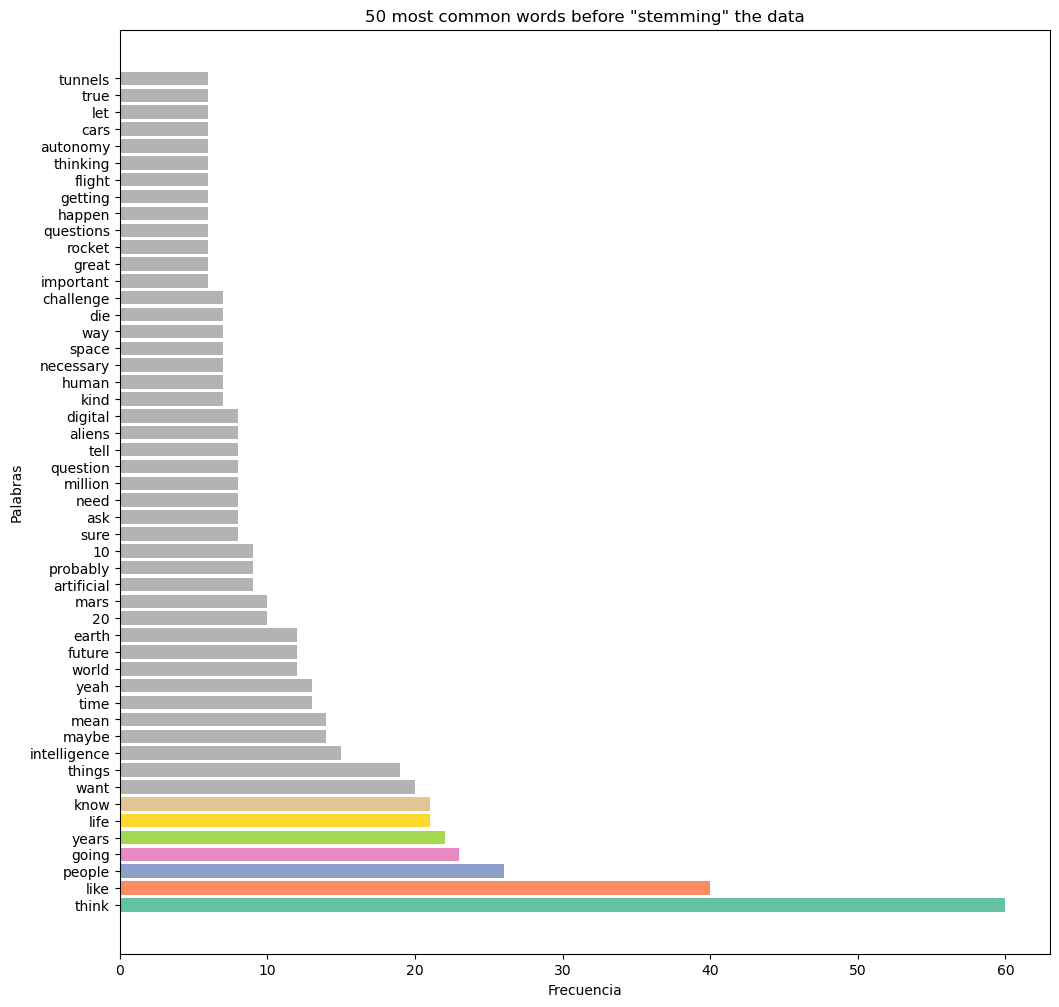

In [78]:
# Vemos en un gráfico las 30 palabras más frecuentes en el discurso de Musk

palabras = [palabra[0] for palabra in top_palabras]
cuenta = [cuenta[1] for cuenta in top_palabras]
color_map = plt.get_cmap('Set2')

plt.figure(figsize=(12, 12))
plt.barh(palabras, cuenta, color=color_map(np.arange(len(palabras))))
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('50 most common words before "stemming" the data')
plt.show()

### **2. Quitar los *STOPWORDS* i realizar un *STEMMING* del conjunto de datos.**


* En el resultado anterior vimos que la mayor frecuencia la ocupan palabras funcionales o vacías que tienen funciones gramaticales pero no tienen un significado léxico o sustantivo en sí mismas.

* Volveremos a tokenizar de nuevo el texto pero excluyendo los "stopwords", los signos de puntación y los espacios en blanco.


In [68]:
# Obtener los textos de los tokens en minúsculas en forma de lista excluyendo las palabras funcionales y los saltos de línea

tokens_lower = [token.text.lower() for token in doc 
                if not token.is_stop 
                and not token.is_punct 
                and not token.is_space]
print(tokens_lower)

['important', 'odds', 'favour', 'life', 'seen', 'world', 'great', 'people', 'like', 'al', 'khawarizmi', 'invented', 'algorithm', 'globally', 'newton', 'henry', 'ford', 'wright', 'brothers', 'albert', 'einstein', 'elon', 'musk', 'rush', 'want', 'places', 'inventing', 'certain', 'industry', 'rocket', 'industry', 'spacex', 'car', 'industry', 'tesla', 'life', 'mission', 'sure', 'thank', 'having', 'honor', 'having', 'great', 'time', 'kids', 'dubai', 'fantastic', 'encourage', 'visit', 'great', 'city', 'thank', 'terms', 'motivations', 'like', 'sort', 'kind', 'long', 'version', 'explanation', 'essentially', 'kid', 'wondering', 'meaning', 'life', 'like', 'came', 'conclusion', 'matters', 'trying', 'understand', 'right', 'questions', 'ask', 'increase', 'scope', 'scale', 'human', 'consciousness', 'better', 'able', 'ask', 'questions', 'think', 'certain', 'things', 'necessary', 'ensure', 'future', 'good', 'things', 'long', 'term', 'having', 'long', 'term', 'sustainable', 'transport', 'sustainable', 

In [69]:
# Volvemos a calcular la frecuencia de las palabras
frecuencia_palabras = Counter(tokens_lower)

# Obtenemos de nuevo las 30 palabras de mayor frecuencia
top_palabras = frecuencia_palabras.most_common(50)

for palabra, frecuencia in top_palabras:
    print(palabra, frecuencia)

think 60
like 40
people 26
going 23
years 22
life 21
know 21
want 20
things 19
intelligence 15
maybe 14
mean 14
time 13
yeah 13
world 12
future 12
earth 12
20 10
mars 10
artificial 9
probably 9
10 9
sure 8
ask 8
need 8
million 8
question 8
tell 8
aliens 8
digital 8
kind 7
human 7
necessary 7
space 7
way 7
die 7
challenge 7
important 6
great 6
rocket 6
questions 6
happen 6
getting 6
flight 6
thinking 6
autonomy 6
cars 6
let 6
true 6
tunnels 6


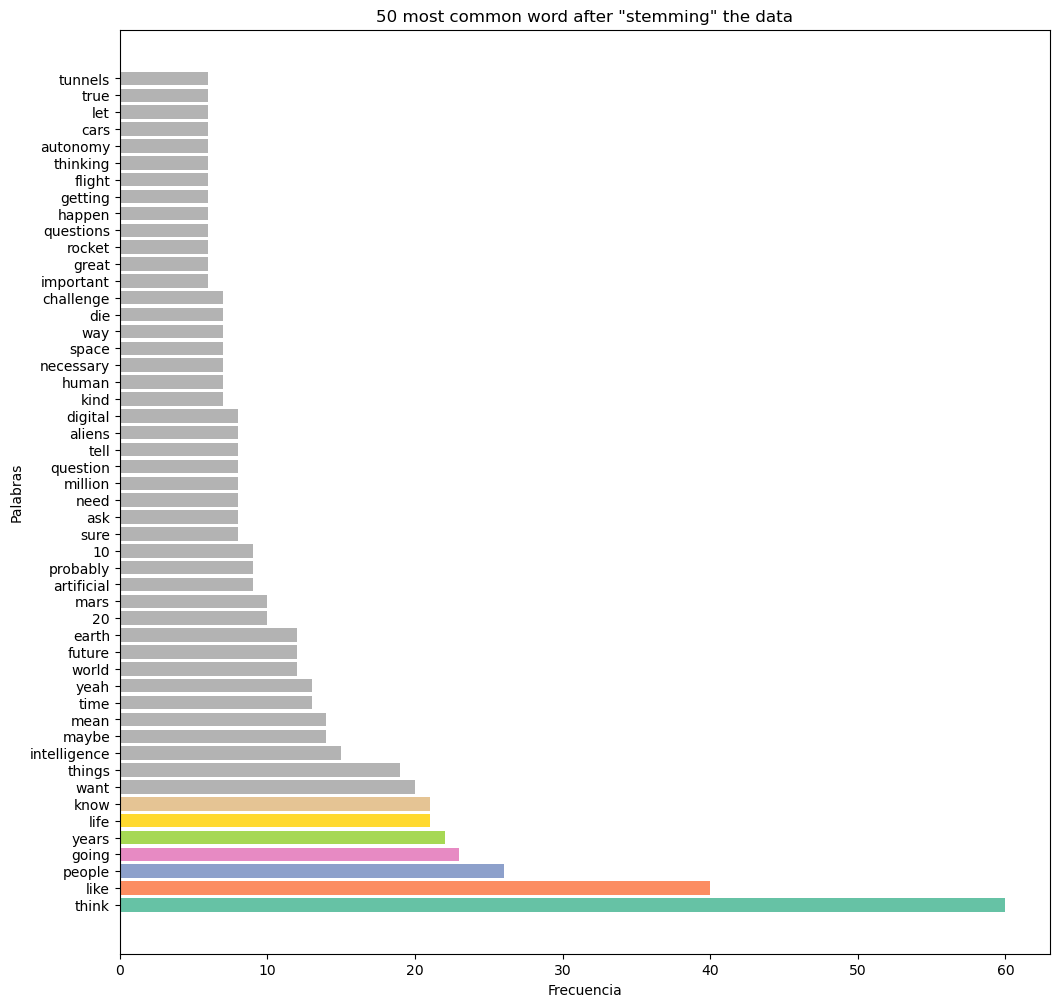

In [79]:
# Vemos en un gráfico las 30 palabras más frecuentes

palabras = [palabra[0] for palabra in top_palabras]
cuenta = [cuenta[1] for cuenta in top_palabras]
color_map = plt.get_cmap('Set2')

plt.figure(figsize=(12, 12))
plt.barh(palabras, cuenta, color=color_map(np.arange(len(palabras))))
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('50 most common word after "stemming" the data')
plt.show()

**Las palabras más frecuentes en el discurso de Musk en Dubái son : ***think, like, people, going, years, life, know, want, things***.
* Respecto a las dos primeras, ampliamente más utilizadas que las demás, que son ***think, like***, cabe decir que ***like*** es también parte del lenguage "slang" de los anglófonos y vemos que en ocasiones Elon Musk lo utiliza como coletilla, es decr, que posiblemente esté sobrerepresentada y que no esté designando cosas que a Elon "le gustan", pero más bien está como palabra de comparación o coletilla.
* ***Think*** puede ser de cuando Elon ofrece al interlocutor y al publico la oportunidad de pensar, de imaginar, pero también inica que él está emitiendo una opinión personal y de la que está bastante o totalmente seguro. Decir que en inglés, cuando en inglés nativo alguién dice ***I tkink, anuncia una conviccón*** y no una opcóin entre otras, o una duda. El ***"I think"*** es seguro, mientras que en lenguas latinas puede denotar lo contrario.
* Esto podría **influir en el analisis de sentimento** y hacer pensar que el discurso es **más positiivo del que es realmente**.
* Por lo que si bien nos invita a pensar, por otro lado, vemos que él mismo ha debido de cuestionarse y ha estado pensado mucho sobre los temas tratados.
* Las palabras técnicas como ***cars, tunnels, autonomy, flight, rocket, mars*** solamente aparecen entre **6 y 10 veces** cada una, por lo que podemos afirmar que estamos delante de una **conversación más bien filosófica/ psichologica**, sobre la visión de Musk y no es tan técnica como uno podría pensar. 

* Mediante la librería spaCy ya hemos realizado el stopwords (con la función **token.is_stop, token.is_punct y token.is_space**)    
* A continuación utilizaremos la **librería nltk** empezando con el texto desde el principio.    
* Hacemos un pipeline para aplicar al texto original


In [71]:
print(tokens_lower)

['important', 'odds', 'favour', 'life', 'seen', 'world', 'great', 'people', 'like', 'al', 'khawarizmi', 'invented', 'algorithm', 'globally', 'newton', 'henry', 'ford', 'wright', 'brothers', 'albert', 'einstein', 'elon', 'musk', 'rush', 'want', 'places', 'inventing', 'certain', 'industry', 'rocket', 'industry', 'spacex', 'car', 'industry', 'tesla', 'life', 'mission', 'sure', 'thank', 'having', 'honor', 'having', 'great', 'time', 'kids', 'dubai', 'fantastic', 'encourage', 'visit', 'great', 'city', 'thank', 'terms', 'motivations', 'like', 'sort', 'kind', 'long', 'version', 'explanation', 'essentially', 'kid', 'wondering', 'meaning', 'life', 'like', 'came', 'conclusion', 'matters', 'trying', 'understand', 'right', 'questions', 'ask', 'increase', 'scope', 'scale', 'human', 'consciousness', 'better', 'able', 'ask', 'questions', 'think', 'certain', 'things', 'necessary', 'ensure', 'future', 'good', 'things', 'long', 'term', 'having', 'long', 'term', 'sustainable', 'transport', 'sustainable', 

In [72]:
# Aplicamos el stopwords y las eliminamos del texto original

def rem_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens


# Aplicamos el stemming

def per_stemming(tokens):
    stemmer = SnowballStemmer('english')
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Creamos el pipeline personalizado incluyendo la tokenización previa del texto
# Tokenizamos el texto

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()] # Nos quedamos solo con los carácteres alfanuméricos en minuscula
    tokens = rem_stopwords(tokens)
    tokens = per_stemming(tokens)
    return tokens

# Llamamos al pipeline creado y le pasamos nuestro texto original

processed_text = preprocess_text(Musk)
print(processed_text)

['someth', 'import', 'enough', 'even', 'odd', 'favour', 'life', 'seen', 'within', 'part', 'world', 'great', 'peopl', 'like', 'invent', 'algorithm', 'global', 'newton', 'henri', 'ford', 'wright', 'brother', 'albert', 'einstein', 'elon', 'musk', 'see', 'rush', 'want', 'go', 'place', 'nobodi', 'certain', 'industri', 'rocket', 'industri', 'spacex', 'car', 'industri', 'tesla', 'life', 'mission', 'whatev', 'sure', 'first', 'thank', 'honor', 'realli', 'great', 'time', 'kid', 'dubai', 'realli', 'fantast', 'realli', 'encourag', 'anyon', 'visit', 'great', 'citi', 'thank', 'term', 'motiv', 'use', 'like', 'sort', 'kind', 'long', 'version', 'explan', 'essenti', 'kid', 'wonder', 'mean', 'life', 'like', 'came', 'conclus', 'realli', 'matter', 'tri', 'understand', 'right', 'question', 'ask', 'increas', 'scope', 'scale', 'human', 'conscious', 'better', 'abl', 'ask', 'question', 'think', 'certain', 'thing', 'necessari', 'ensur', 'futur', 'good', 'thing', 'long', 'term', 'long', 'term', 'sustain', 'transp

#### **Veamos las **20 palabras más frecuentes** antes y despúes de aplicar el pipeline**:


In [73]:
# Guardamos los datos del antes

all_tokens = word_tokenize(Musk)
freq_before = nltk.FreqDist(all_tokens)

# Tenemos los datos de después
freq_after = nltk.FreqDist(processed_text)

# Obtención de las palabras y frecuencias antes y después

top_words_before = freq_before.most_common(20)
words_before, counts_before = zip(*top_words_before)

top_words_after = freq_after.most_common(20)
words_after, counts_after = zip(*top_words_after)

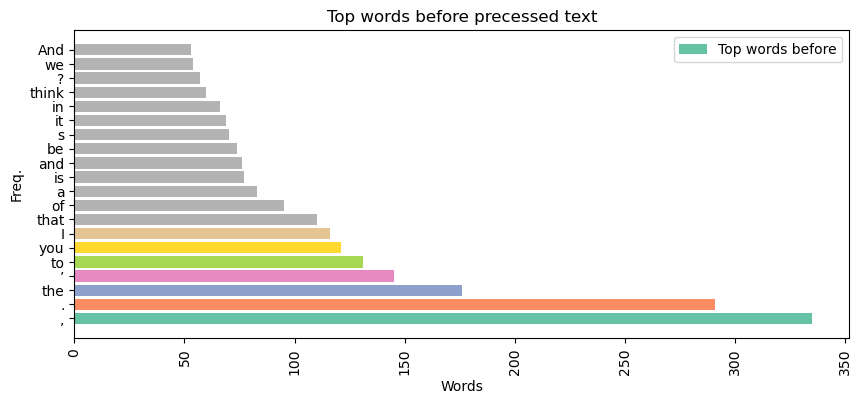

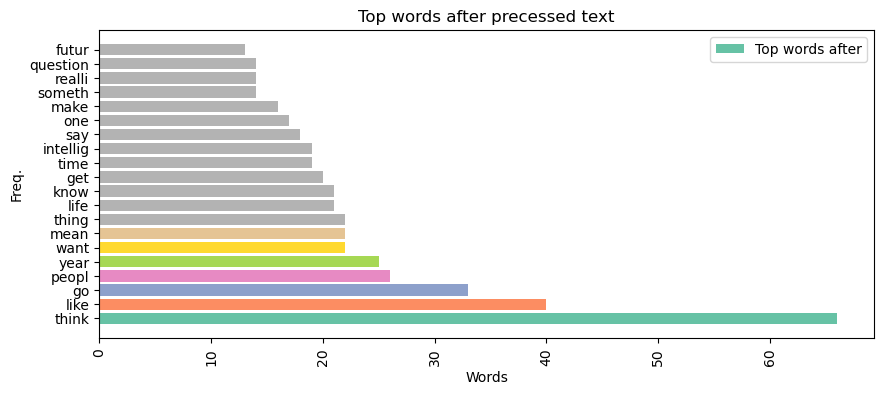

In [74]:
# Creación del gráfico de barras para ver la diferencia

color_map = plt.get_cmap('Set2')

plt.figure(figsize=(10, 4))
plt.barh(words_before, counts_before, label='Top words before', color=color_map(np.arange(len(palabras))))
# plt.bar(words_after, counts_after, label='Top words after')
plt.xlabel('Words')
plt.ylabel('Freq.')
plt.title('Top words before precessed text')
plt.xticks(rotation=90)
plt.legend()
plt.show()


plt.figure(figsize=(10, 4))
# plt.bar(words_before, counts_before, label='Top words before')
plt.barh(words_after, counts_after, label='Top words after', color=color_map(np.arange(len(palabras))))
plt.xlabel('Words')
plt.ylabel('Freq.')
plt.title('Top words after precessed text')
plt.xticks(rotation=90)
plt.legend()
plt.show()

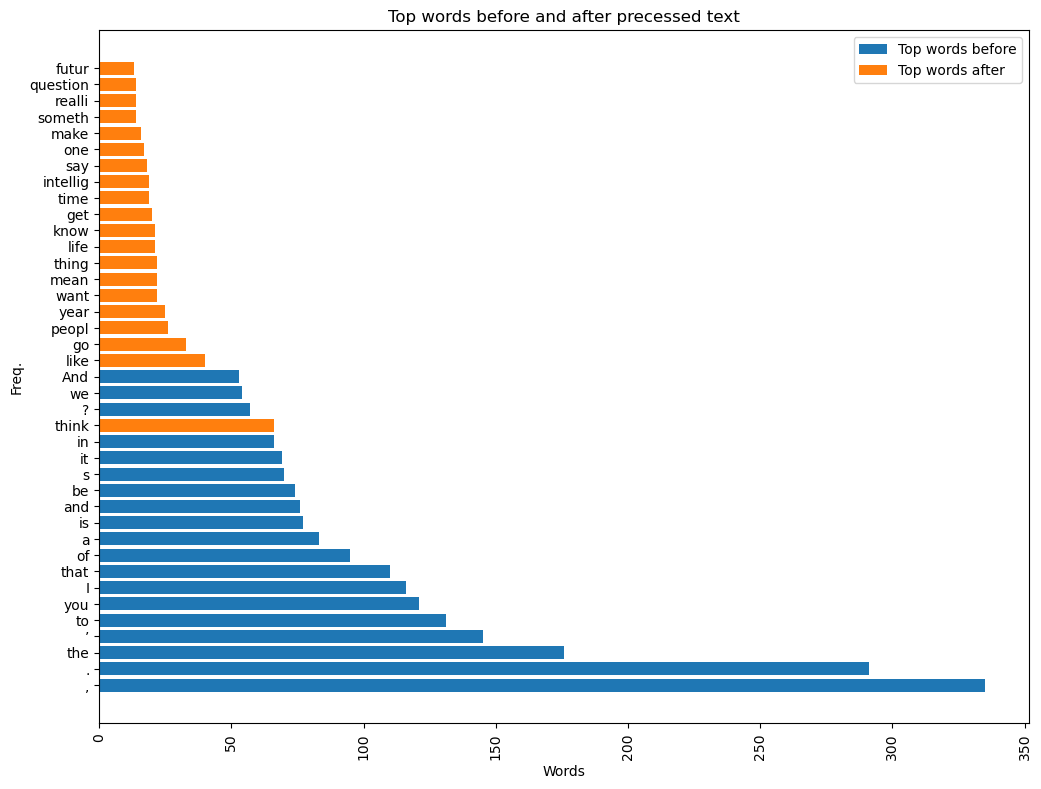

In [75]:
# Creación del gráfico de barras para ver la diferencia

plt.figure(figsize=(12, 9))
plt.barh(words_before, counts_before, label='Top words before')
plt.barh(words_after, counts_after, label='Top words after')
plt.xlabel('Words')
plt.ylabel('Freq.')
plt.title('Top words before and after precessed text')
plt.xticks(rotation=90)
plt.legend()
plt.show()

* Vemos que la mayoría del tiempo se utilizaron **hasta 4 veces más palabras generales que las específicas**, palabras que posteriormente se han ido descartando para ver lo realmente importante. 
* El resultado obtenido es parecido al del ejercicio anterior con **spaCy**, pero no completamente, y entre las palabras más frecuentes tras el procesado tenemos **think, like, go, peopl(e), year, want, mean, life, know, time, intellig(ence), make, something, question, futur(e)**. 

* Podemos decir que nos insta a pensar, a comprender, a conocer y de alguna manera, a prepararnos, a "hacer algo" para poder abarcar mejor los retos que nos vienen de cara al futuro.
* Usa verbos de acción como *want*, *get* y *go*, al mismo tiempo que otros verbos más pasivos o reflexivos 
* Para explicarse, hace muchas comparaciones y referencias (con la palabra "like" en el sentido de "como")
* Hace muchas referencias al humano respecto al paso del tiempo, a su devenir, a buscar nuevos signifiicados en la vida para cuando haya menos trabajo para que lo realicen las personas.
* Vemos como también cuestiona algunas cosas y tiene dudas, o que, honestamente, no es capaz o no se arriesga, a responder a preguntas concretas difíciles de responder, sobre cómo será la vida en el futuro y cuáles serán las amenazas y los desafíos, aunque tiene bastante claso que una AI superpotente perjudicaría al ser humano. 
* Más que un manual de instrucciones, se trata de una entrevista de contenido relacionado con la manera en la que Musk ve la vida, el trabajo, la tecnología... y como toma decisiones. El contenido es práctico, pero también trasncendental, filosófico y denota también cierta incertidumbre.
* Es un hombre que habla claro, pero al que le gusta dar alguna vuelta y usa bastantes coletillas, como "you know", muy típica en inglés, lo que explica la aparición de las palabras ***you*** y ***know*** como unas de las más frecuentes en el texto ; lo mismo puede pasar con una parte de las palabras "mean" (de la semi coletilla ***I mean...***, o los que sería en castellano "quiero decir...". Elon la usa también de forma más signficativa cuando habla del sentdo de la vida humana, de su significado).

### **3. Realiza el análisis de sentimiento del conjunto de datos.**
    

Con SentimentIntensityAnalyzer, vamos a buscar las polaridades en en contenido de la entrevista para tener una idea de lo positivo, neutro o negativo que se desprende de las palabras empleadas. 

In [76]:
sample = Musk
vader.polarity_scores(sample)

NameError: name 'vader' is not defined

In [ ]:
# creamos una instancia de la clase SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sentiment = sia.polarity_scores(Musk)

print("La entrevista con Elon Musk presenta estas características:\n",sentiment)

**La entrevista de **Musk en Dubái**, según las características proporcionadas, muestra una distribución de sentimientos en el siguiente formato para el análisis del texto en su conjunto:**

    Negativo: 0.06
    Neutro : 0.78
    Positivo : 0.16
    Compound:  0.9999
    
Estas puntuaciones sugieren que el discurso tiene una alta presencia de sentimientos neutros (neu: 0.78), seguidos de un componente positivo (pos: 0.16). La puntuación compuesta (compound: 0.9999) es cercana a 1, lo que indica un sentimiento generalmente positivo en el discurso de Musk.

El análisis del texto en su conjunto nos proporciona una visión general pero para el caso de textos largos se pueden perder detalles o matices presentes en oraciones individuales. Así que realizaremos una análisis de sentimiento por sentencias que nos permite identificar y analizar el sentimiento en cada parte por separado.

In [ ]:
# Sentimiento del discurso por sentencias y calculamos la media de las mismas

# Dividir el texto en sentencias
def analyze_sentiment_by_sentences(text):
    sentences = nltk.sent_tokenize(text)

# Crear el analizador de sentimiento
    sia = SentimentIntensityAnalyzer()

# Inicializar listas para almacenar las puntuaciones de sentimiento de cada oración
    positive_scores = []
    negative_scores = []
    neutral_scores = []

# Analizar el sentimiento de cada oración y almacenar las puntuaciones
    for sentence in sentences:
        sentiment_score = sia.polarity_scores(sentence)
        compound_score = sentiment_score['compound']
        
        if compound_score >= 0.05:
            positive_scores.append(compound_score)
        elif compound_score <= -0.05:
            negative_scores.append(compound_score)
        else:
            neutral_scores.append(compound_score)
            
# Calcular la media de las puntuaciones para cada categoría de sentimiento

    avg_positive = sum(positive_scores) / len(positive_scores) if positive_scores else 0.0
    avg_negative = sum(negative_scores) / len(negative_scores) if negative_scores else 0.0
    avg_neutral = sum(neutral_scores) / len(neutral_scores) if neutral_scores else 0.0

    return avg_positive, avg_negative, avg_neutral


positive, negative, neutral = analyze_sentiment_by_sentences(Musk)

print("Puntuación promedio positiva:", positive)
print("Puntuación promedio negativa:", negative)
print("Puntuación promedio neutral:", neutral)


  
**Podemos interpretar los resultados del análisis de sentimiento para el texto analizado:**

**Puntuación promedio positiva: 0.4613**
Esto indica que, en promedio, las oraciones del texto expresan sentimientos positivos. La puntuación positiva es relativamente alta, sugiriendo que hay varias oraciones en el texto que contienen palabras o frases con connotaciones positivas.

**Puntuación promedio negativa: -0.4138**
La puntuación negativa es también significativa y cercana a -0.5, lo que indica que hay una cantidad considerable de oraciones en el texto que expresan sentimientos negativos. Palabras o frases con connotaciones negativas han contribuido a esta puntuación.

**Puntuación promedio neutral: -0.0004**
Esta puntuación es muy cercana a cero, lo que sugiere que algunas oraciones pueden ser neutrales o que el texto contiene un equilibrio entre oraciones positivas y negativas. La puntuación neutral es la más cercana a la neutralidad, lo que significa que hay menos expresiones fuertes de sentimientos neutros en el texto.

En resumen, el análisis de sentimiento muestra que el texto recopilado de esta entrevista contiene un equilibrio entre sentimientos positivos y negativos, con una tendencia ligeramente positiva. Este análisis concuerda con un discurso donde Elon Musk mezcla la esperanza en el futuro pero con preocupación sobre algunos aspectos de la Inteligencia artificial en caso de llegar a ser mucho más avanzada e inteligente que los humanos.
